In [14]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, BasicAer, IBMQ, execute
from qiskit.providers.ibmq import least_busy
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

from qiskit.visualization import plot_histogram

ibmqfactory.load_account:WARNING:2021-12-06 12:29:46,611: Credentials are already in use. The existing account in the session will be replaced.


In [15]:
def Oracle(case, n):
    oracle_qc = QuantumCircuit(n+1)
    if case == "balanced":
        for qubit in range(n):
            oracle_qc.cx(qubit, n)
    if case == "constant":
        output = np.random.randint(2)
        if output == 1:
            oracle_qc.x(n)
            
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = " Oracle"
    return oracle_gate

In [16]:
def deutch_josza_algo(n, case = 'random'):
    deutch_josza_circuit = QuantumCircuit(n+1, n)
    for qubit in range(n):
        deutch_josza_circuit.h(qubit)
    deutch_josza_circuit.x(n)
    deutch_josza_circuit.h(n)
    
    if case == 'random':
        random = np.random.randint(2)
        if random == 0:
            case = 'constant'
        else:
            case = 'balanced'
    oracle = Oracle(case, n)
    deutch_josza_circuit.append(oracle, range(n+1))
    
    for i in range(n):
        deutch_josza_circuit.h(i)
        deutch_josza_circuit.measure(i, i)
    return deutch_josza_circuit
    

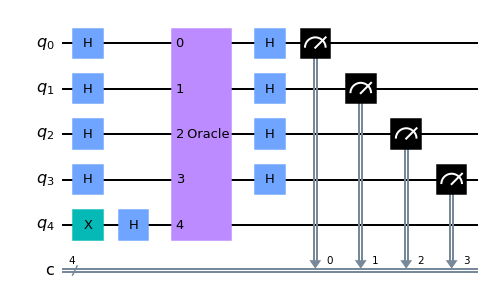

In [17]:
n = 4
deutch_josza_circuit = deutch_josza_algo(n)
deutch_josza_circuit.draw()

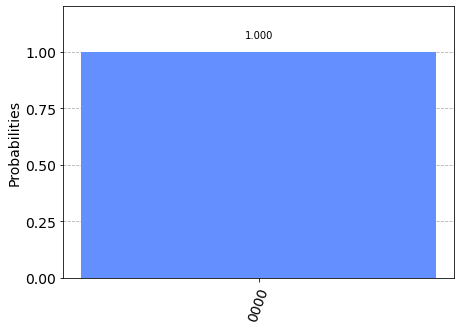

In [18]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
deutch_josza_circuit = deutch_josza_algo(n, 'constant')
results = execute(deutch_josza_circuit, backend = backend, shots = shots).result()
answer = results.get_counts()

plot_histogram(answer)

In [ ]:
backend = least_busy(provider.backends(filters = lambda x: x.configuration().n_qubits >= (n + 1) and 
                                       not x.configuration().simulator and x.status().operational == True))
print("least busy backend: ", backend)
%qiskit_job_watcher
deutch_josza_circuit = deutch_josza_algo(n)
job = execute(deutch_josza_circuit, backend = backend, shots = shots, optimization_level = 3)

In [ ]:
results = job.result()
answer = results.get_counts()
plot_histogram(answer)